In [ ]:
# Exercise 6. Feature selection and classification

In [33]:
# 1. Classification with features calculated in Exercise 3
import pandas as pd
import os
import numpy as np
folder='RawData'
file='acc_exp01_user01.txt'
test=1
subject=1
df = pd.read_csv(folder + os.sep + file, names=['x', 'y', 'z'], sep=" ",header=None)
fileL='labels.txt'
labels = pd.read_csv(folder + os.sep + fileL, names=['test', 'subject', 'label','start', 'stop'], sep=" ", header=None)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labels, labels['subject'], test_size=0.3, train_size = 0.7)

In [49]:
# 2. Building a k-nearest neighbor classifier
def warn(*args, **kwargs):
 pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled,y_train)
print('Train accuracy:',knn_clf.score(X_train_scaled,y_train))
print('Test accuracy:',knn_clf.score(X_test_scaled,y_test))
# We can see that quality of accuracy is bad.

Train accuracy: 0.4876325088339223
Test accuracy: 0.16712328767123288


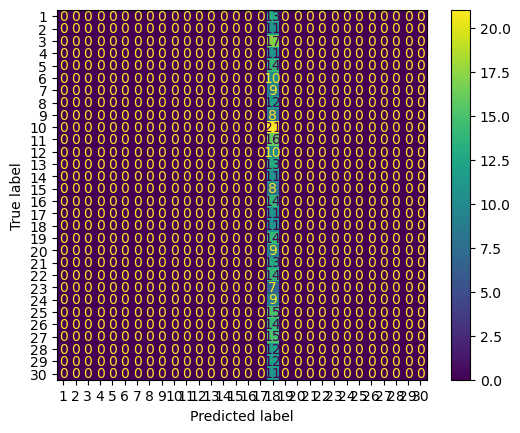

In [54]:
# 3. Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = knn_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.show()

In [71]:
# 4. Sequential Forward Selection (SFS)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(knn_clf, k_features=3)
sfs1 = sfs.fit(X_test, y_test)

In [ ]:
# 5.
# SFS do not run...